In [6]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn
warnings.filterwarnings("ignore")

In [8]:
df_weather = pd.read_excel("London Excel.xlsx")
df_weather.head()

,Местное время в Лондон-Сити (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
0,2023-08-31 23:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0
1,2023-08-31 23:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0
2,2023-08-31 22:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 270 м, рассеянная (40-50%)...",10.0 и более,13.0
3,2023-08-31 22:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 300 м, разорванная (60-90%...",10.0 и более,13.0
4,2023-08-31 21:50:00,15.0,757.3,757.7,88,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,NaN,"Разорванная (60-90%) 270 м, разорванная (60-90...",10.0 и более,13.0


In [9]:
df_weather.columns

Index(['Местное время в Лондон-Сити (аэропорт)', 'T', 'P0', 'P', 'U', 'DD',
       'Ff', 'ff10', 'WW', 'W'W'', 'c', 'VV', 'Td'],
      dtype='object')

In [10]:
df_weather["WW"].value_counts()

Слабый(ая)(ые) дождь            70
Мгла                            11
Слабый(ая)(ые) морось            5
Дождь, морось                    5
Дождь                            4
Вблизи гроза                     2
Дымка                            2
Гроза                            1
Сильный(ая)(ые) дождь            1
Слабый(ая)(ые) дождь, морось     1
Name: WW, dtype: int64

In [11]:
df_weather["W'W'"].value_counts()

Дождь                                   17
Дождь, морось                            8
Морось                                   4
Гроза, гроза, дождь, дождь               1
Ливень (ливни), дождь, дождь, морось     1
Name: W'W', dtype: int64

In [12]:
df_weather['Start date'] = pd.to_datetime(df_weather['Местное время в Лондон-Сити (аэропорт)'])
df_weather['Start date'] = df_weather['Start date'].dt.strftime('%m.%d.%Y %H:%M')
start_date_column = df_weather["Start date"]
df_weather.drop(columns = "Местное время в Лондон-Сити (аэропорт)")
df_weather.insert(0, 'Start Date', start_date_column)
df_weather["Temperature"] = df_weather["T"]

In [13]:
df_weather["Start date"] = df_weather["Местное время в Лондон-Сити (аэропорт)"]
df_weather['Start Date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df_weather['Start date'] = df_weather['Start date'].dt.strftime('%m.%d.%Y %H:%M')
df_weather

,Start Date,Местное время в Лондон-Сити (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Start date,Temperature
0,2023-08-31 23:50:00,2023-08-31 23:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0,08.31.2023 23:50,15.0
1,2023-08-31 23:20:00,2023-08-31 23:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0,08.31.2023 23:20,15.0
2,2023-08-31 22:50:00,2023-08-31 22:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 270 м, рассеянная (40-50%)...",10.0 и более,13.0,08.31.2023 22:50,15.0
3,2023-08-31 22:20:00,2023-08-31 22:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 300 м, разорванная (60-90%...",10.0 и более,13.0,08.31.2023 22:20,15.0
4,2023-08-31 21:50:00,2023-08-31 21:50:00,15.0,757.3,757.7,88,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,NaN,"Разорванная (60-90%) 270 м, разорванная (60-90...",10.0 и более,13.0,08.31.2023 21:50,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2023-08-01 02:20:00,2023-08-01 02:20:00,15.0,750.4,750.8,88,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Рассеянная (40-50%) 360 м,10.0 и более,13.0,08.01.2023 02:20,15.0
1473,2023-08-01 01:50:00,2023-08-01 01:50:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Незначительная (10-30%) 390 м,10.0 и более,13.0,08.01.2023 01:50,16.0
1474,2023-08-01 01:20:00,2023-08-01 01:20:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",7,NaN,NaN,NaN,Рассеянная (40-50%) 420 м,10.0 и более,13.0,08.01.2023 01:20,16.0
1475,2023-08-01 00:50:00,2023-08-01 00:50:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Незначительная (10-30%) 510 м,10.0 и более,13.0,08.01.2023 00:50,16.0


In [14]:
# В колонках WW и W'W' содержатся данные о дожде. Добавим категориальную переменную

df_weather[['WW', "W'W'"]] = df_weather[['WW', "W'W'"]].fillna(0)
df_weather['is_rain'] = (df_weather[['WW', "W'W'"]] != 0).any(axis=1).astype(int)
df_weather["is_rain"].value_counts()

0    1366
1     111
Name: is_rain, dtype: int64

In [15]:
# оставим в датасете с погодой только необходимое
df_weather = df_weather.loc[:, ['Start date', 'T', 'is_rain']]

In [16]:
df_weather

,Start date,T,is_rain
0,08.31.2023 23:50,15.0,0
1,08.31.2023 23:20,15.0,0
2,08.31.2023 22:50,15.0,0
3,08.31.2023 22:20,15.0,0
4,08.31.2023 21:50,15.0,0
...,...,...,...
1472,08.01.2023 02:20,15.0,0
1473,08.01.2023 01:50,16.0,0
1474,08.01.2023 01:20,16.0,0
1475,08.01.2023 00:50,16.0,0


Выше получили дальнейший датасет погоды, с которым будем работать.

In [18]:
## Поработаем с данным
df = pd.read_csv("LondonBikeJourneyAug2023.csv", sep=';')
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['Start date'] = df['Start date'].dt.strftime('%m.%d.%Y %H:%M')
df.dropna(inplace = True)
df

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,08.01.2023 00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,08.01.2023 00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,08.01.2023 00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,08.01.2023 00:01,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,08.01.2023 00:01,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,08.31.2023 23:59,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,08.31.2023 23:59,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,08.31.2023 23:59,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,08.31.2023 23:59,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [20]:
from tqdm import tqdm # этот цикл будет выполняться примерно 1.5 часа, поэтому попробуем более эффективно смерджить данные

df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Start date'] = pd.to_datetime(df['Start date'], format='%m.%d.%Y %H:%M')

df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Temperature'] = None
df['is_rain'] = None
for index, row in tqdm(df.iterrows(), total=len(df)):
    trip_time = row['Start date']
    nearest_weather = df_weather.loc[df_weather['Start date'].sub(trip_time).abs().idxmin()]
    df.at[index, 'Temperature'] = nearest_weather['T']
    df.at[index, 'is_rain'] = nearest_weather['is_rain']

df


100%|██████████| 776527/776527 [09:49<00:00, 1318.15it/s]


,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Temperature,is_rain
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,15.0,0
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,15.0,0
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,15.0,0
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,15.0,0


In [19]:
df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Start date'] = pd.to_datetime(df['Start date'], format='%m.%d.%Y %H:%M')

df_weather_sorted = df_weather.sort_values(by='Start date')
df_trips = pd.merge_asof(df, df_weather_sorted, left_on='Start date', right_on='Start date', direction='nearest')
df_trips

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),T,is_rain
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,15.0,0
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,15.0,0
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,15.0,0
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,15.0,0


В целом, долгая обработка файлов завершена, в дальнейшем будем работать с merged_df

In [21]:
# Начнем осмотр данных и визуализацию, проверим пропуски

df_trips.isna().sum() # -> пропусков нет


Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
T                       0
is_rain                 0
dtype: int64

In [22]:
# Посчитаем среднее значение, посмотрим стандартное отклонение температуры

mean_temperature = df_weather['T'].mean()
std_temperature = df_weather['T'].std()

print("Среднее значение температуры:", round(mean_temperature, 2))
print("Стандартное отклонение температуры:", round(std_temperature,2))

Среднее значение температуры: 18.55
Стандартное отклонение температуры: 3.12


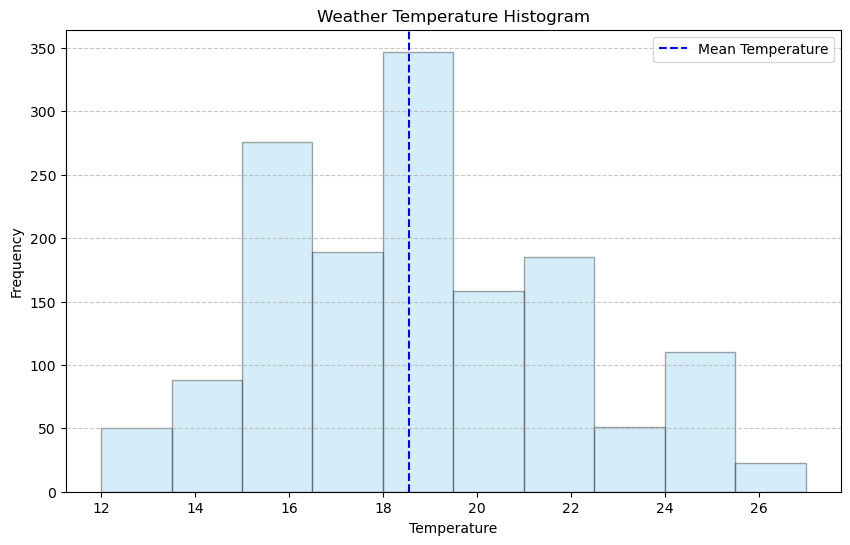

In [23]:
# Посмотрим распределение температуры за август по всем поездкам, также отметим на графике среднее значение

plt.figure(figsize=(10, 6))
plt.hist(df_weather['T'], bins=10, color='skyblue', edgecolor ='black', alpha = 0.35)
plt.axvline(x = mean_temperature, color='blue', linestyle='--', label='Mean Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Weather Temperature Histogram')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # -> Вывод: распределение стремится к нормальному

In [27]:
# Посмотрим, сколько поездок было в дождливую погоду
df_trips["is_rain"].value_counts()

0    736053
1     40474
Name: is_rain, dtype: int64

Видим, что примерно 40 тысяч поездок (примерно 6% от всех поездок) были во время дождя


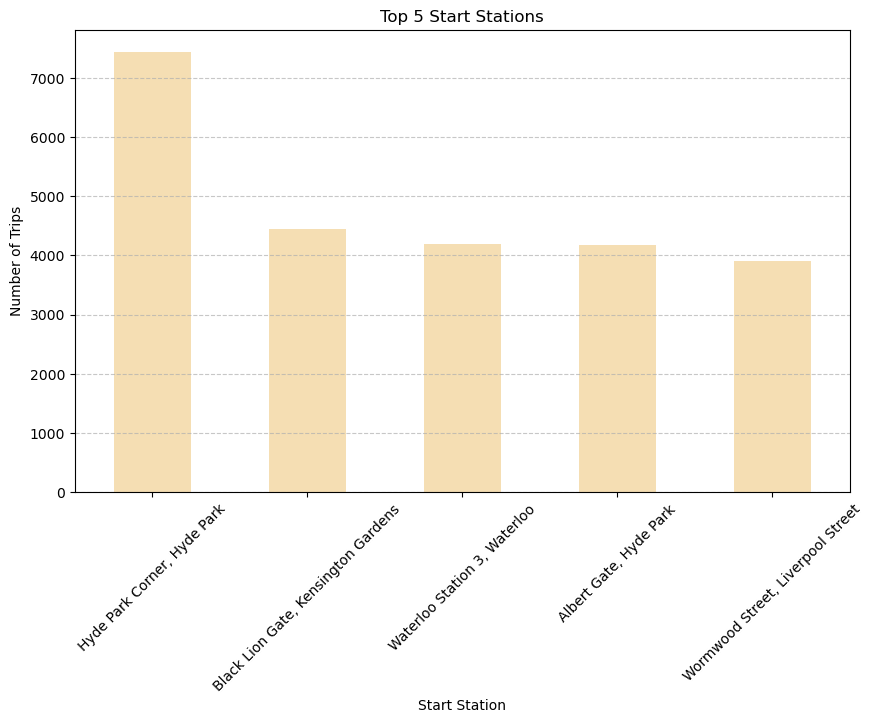

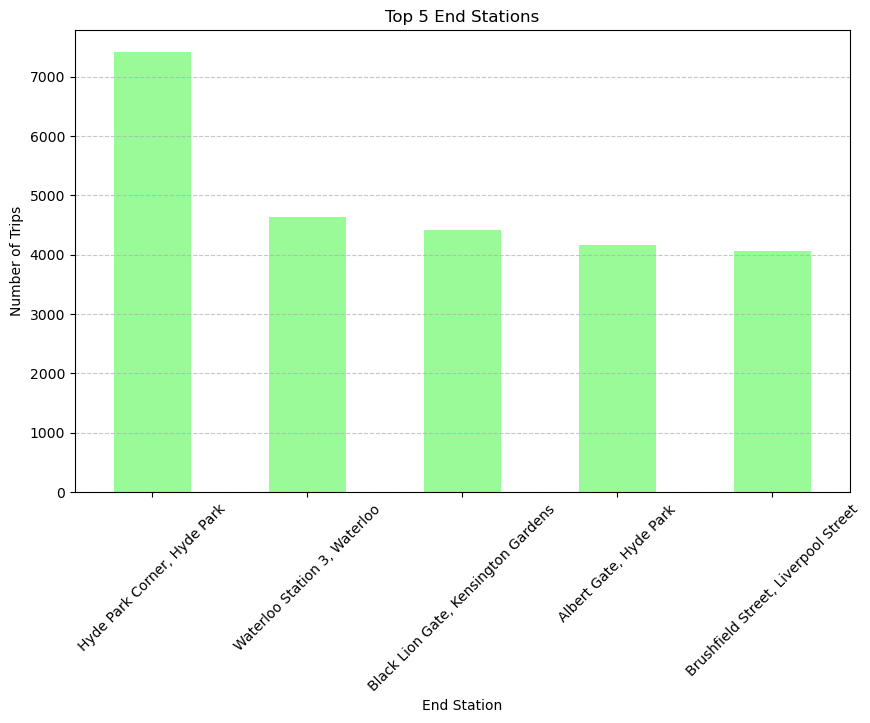

In [25]:
# Свизуализируем топ-5 станций, с которых берут байки, а также топ-5 станций, на которых оставляют байки

start_station_counts = df_trips['Start station'].value_counts().head(5)
end_station_counts = df_trips['End station'].value_counts().head(5)

plt.figure(figsize=(10, 6))
start_station_counts.plot(kind='bar', color='wheat')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title('Top 5 Start Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
end_station_counts.plot(kind='bar', color='palegreen')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.title('Top 5 End Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
df_trips["Start date"].value_counts()

2023-08-22 18:09:00    96
2023-08-15 18:13:00    92
2023-08-22 18:17:00    90
2023-08-22 08:34:00    89
2023-08-09 17:45:00    89
                       ..
2023-08-07 02:24:00     1
2023-08-26 05:15:00     1
2023-08-27 02:50:00     1
2023-08-27 02:52:00     1
2023-08-08 04:12:00     1
Name: Start date, Length: 41523, dtype: int64

In [ ]:
# Дальше будем проверять гипотезу о том, что днем байки берут чаще, чем ночью, а также о влиянии дождя на частоту аренды велосипеда.